# Single cell fluorescence/holographic trajectory plotting

Designed to measure a series of time-dependent single cell fluorescent/holographic intensities and then plot them on comparative graphs


```
Author: 
- Nathan J. Day (nathan.day.16@ucl.ac.uk)
```


### STEPS
1. Measure the intenstities of the cell trajectories and save out as csv and pandas dataframe
2. Plot these trajectories 


In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import ndimage
from skimage import io
from sklearn import preprocessing

## Measure 

Read single cell mask information and obtain fluorescent and phase stats. If the data already exists in a .csv and just needs to be plotted then skip to the plotter section.

#### Raw data (image) location

The image data needs to be organised inside the ```root_dir``` as follows:

```
phase/
    0000_phase.tif
    0001_phase.tif
    ...
gfp/
    0000_gfp.tif
    0001_gfp.tif
    ...
rfp/
    0000_rfp.tif
    0001_rfp.tif
    ...
```
And the corresponding mask data needs to be organised inside the ```mask_version``` folder in the ```root_dir``` as follows:

```
singlecell_labels_manual/labels_cell1a
                            0000_mask.tif
                            0001_mask.tif
                            ...
singlecell_labels_manual/labels_cell2a
                            0000_mask.tif
                            0001_mask.tif
                            ...
singlecell_labels_manual/labels_cell...
```
where the ```singlecell_labels_manual = mask_version``` at the time of writing

In [ ]:
root_path = "C:/Users/Nathan/Documents/data/fucci/"

gfp_dir = os.path.join(root_path, "gfp")
rfp_dir = os.path.join(root_path, "rfp")
phase_dir = os.path.join(root_path, "phase")

gfp_list = [m for m in os.listdir(gfp_dir) if m.endswith('.tif')]
rfp_list = [m for m in os.listdir(rfp_dir) if m.endswith('.tif')]
phase_list = [m for m in os.listdir(phase_dir) if m.endswith('.tif')]

cell_ids = ["1a", "1b", "2a", "2b", "3a", "3b", "4", "5"]
mask_type = "gold" #gold standard or modelv4, modelv5 etc
 

In [ ]:
for cell in cell_ids:

    masks_dir_name = "labels_cell" + cell 
    masks_dir = os.path.normpath(os.path.join(root_path, "singlecell_labels_manual", masks_dir_name))
    mask_list = [m for m in os.listdir(masks_dir) if m.endswith('modified.tif')] # add something to include unmodified if modified doesnt exist?

    ### DIRECTORY CREATION ###
    dirName = os.path.join(root_path, 'stats') 
    try:
    # Create target Directory
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")
    
    mask_type_dirName = os.path.join(dirName, mask_type) 
    try:
    # Create target Directory
        os.mkdir(mask_type_dirName)
        print("Directory " , mask_type_dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , mask_type_dirName ,  " already exists")    
            
    stat_file_dir = os.path.normpath(os.path.join(mask_type_dirName, "cell"+cell))
    try:
    # Create target Directory
        os.mkdir(stat_file_dir)
        print("Directory " , stat_file_dir ,  " Created ") 
    except FileExistsError:
        print("Directory " , stat_file_dir ,  " already exists")        
        #create target file
    stat_file = os.path.normpath(os.path.join(stat_file_dir, 'stats.csv'))
    
    df = pd.DataFrame([], columns=['GFP Intensity', 'RFP Intensity', 'Phase Intensity', 'Area', 'x','y']) #is this assignment of df correct? or does it overwrite "count_cells" above
   
    for i, mask_name in enumerate(mask_list):
        
        print(i)
        print(cell)
        
        mask = io.imread(os.path.normpath(os.path.join(masks_dir, mask_name)))
        labelled, n_labels = ndimage.label(mask)
        
        gfp = io.imread(os.path.join(gfp_dir,gfp_list[i]))
        gfp_pix_value = ndimage.sum(gfp, labelled, 1) 
    
        rfp = io.imread(os.path.join(rfp_dir,rfp_list[i]))
        rfp_pix_value = ndimage.sum(rfp, labelled, 1)
        
        phase = io.imread(os.path.join(phase_dir,phase_list[i]))
        phase_pix_value = ndimage.sum(phase, labelled, 1)

        
        df.loc[i,'GFP Intensity'] = gfp_pix_value 
        df.loc[i,'RFP Intensity'] = rfp_pix_value
        df.loc[i,'Phase Intensity'] = phase_pix_value 
        df.loc[i,'Area'] = ndimage.sum(mask)
        #df.loc[i,'Max'] =  ndimage.maximum(phase, labelled)

        centroid = ndimage.measurements.center_of_mass(mask)
        y = centroid[0]
        x = centroid[1]
        df.loc[i,'x'] = format(x, '.2f')
        df.loc[i,'y'] = format(y, '.2f')
    
    df.to_csv(stat_file, index=False)  
    print(df)
print('FIN')    

### Load data
If the data already exists in a .csv and just needs to be plotted then skip to this part, **but make sure you uncomment then following cell!**

+ Number of cells
+ Number of frames/timepoints (length of trajectory)

##### At time of writing this the data organisation is as follows
Stats.csv:

|   |GFP Intensity|RFP Intensity|Phase Intensity|Area| x | y |
|---|-------------|-------------|---------------|----|---|---|
|1  |             |             |               |    |   |   |
|2  |             |             |               |    |   |   |
|...|             |             |               |    |   |   |
|t  |             |             |               |    |   |   |

And the directory organisation is as follows:

```
root_path/stats/mask_version/
                          cell1/stats.csv
                          cell2/stats.csv
                          ...
```
Where ```mask_version``` could be any of the following
```
mask_version = { /gold
                 /modelv4
                 /modelv5
                     ... } 
```

In [88]:
### Data location ###
root_path = "C:/Users/Nathan/Documents/data/fucci/stats/gold"
cell_ids = ["1a", "1b", "2a", "2b", "3a", "3b", "4", "5"]

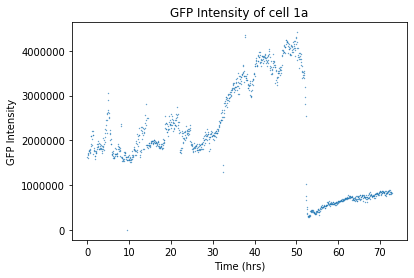

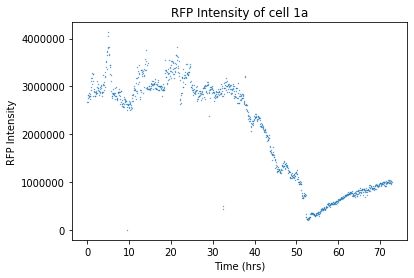

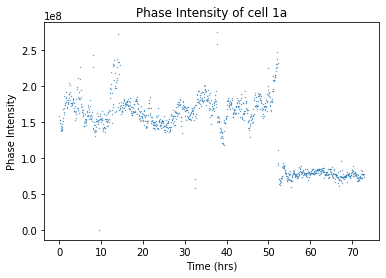

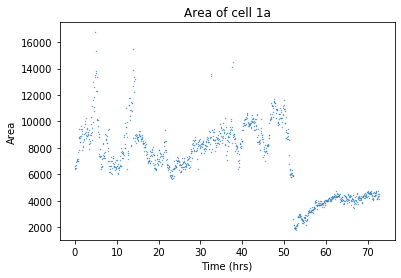

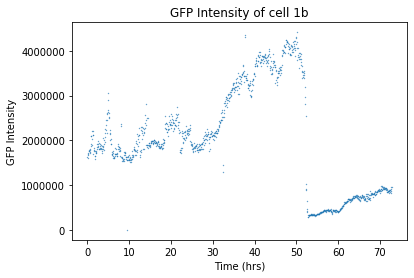

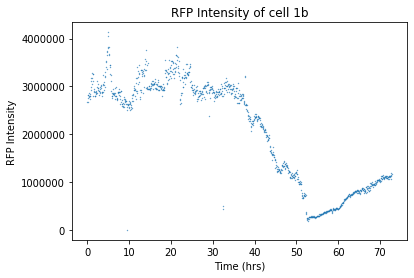

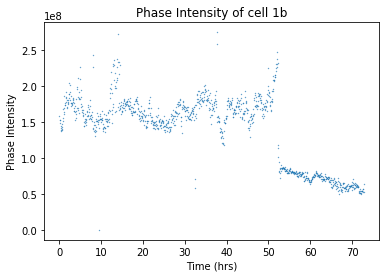

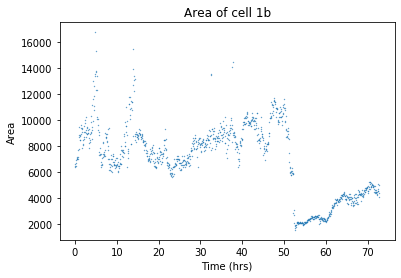

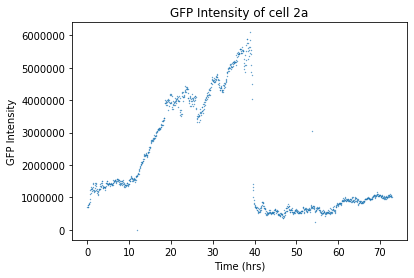

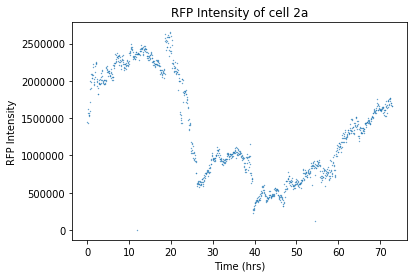

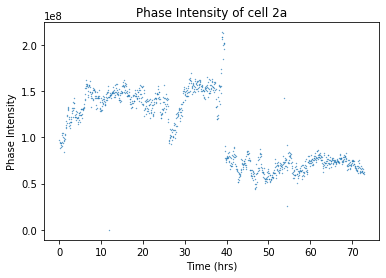

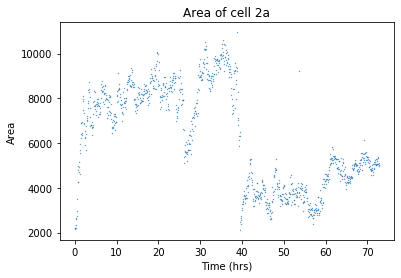

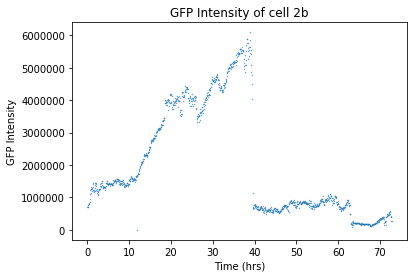

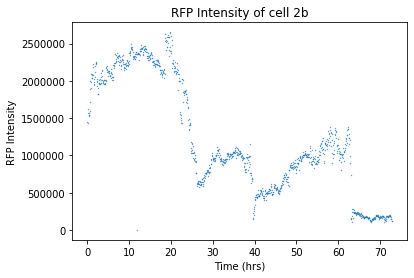

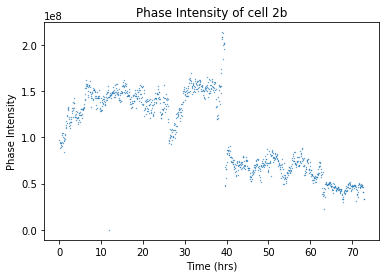

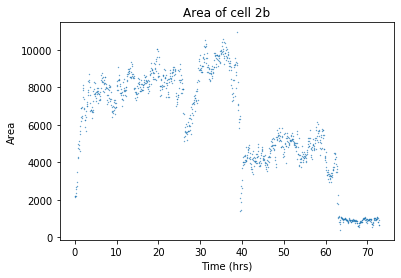

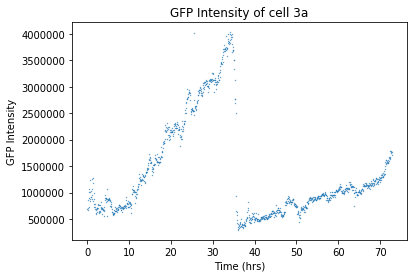

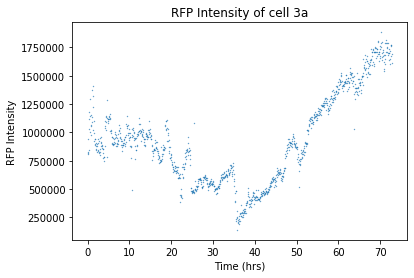

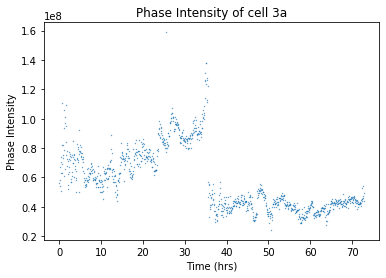

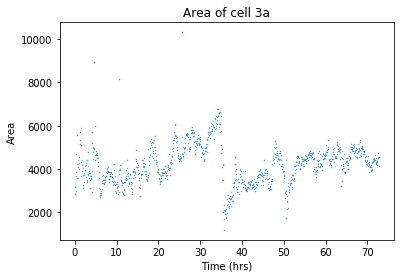

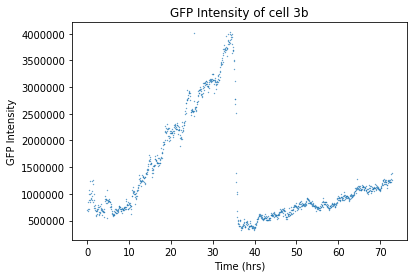

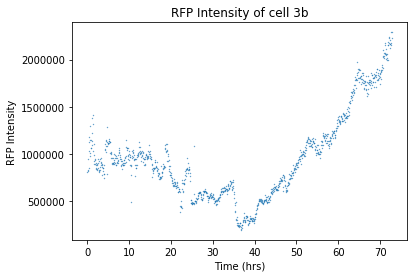

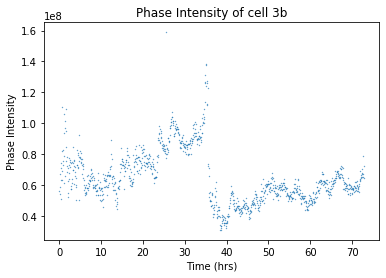

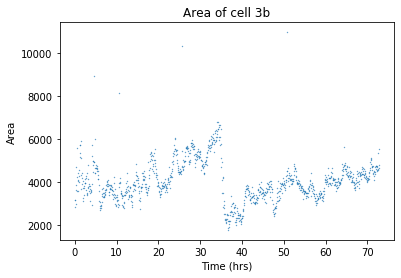

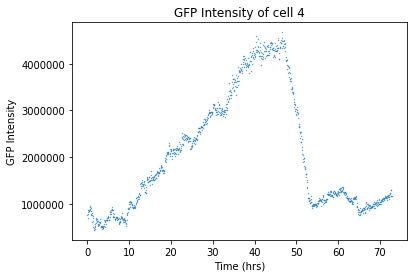

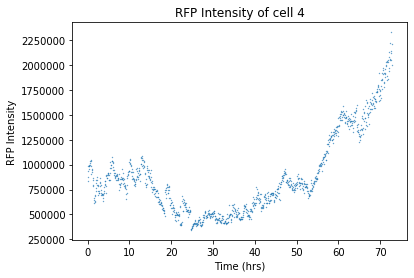

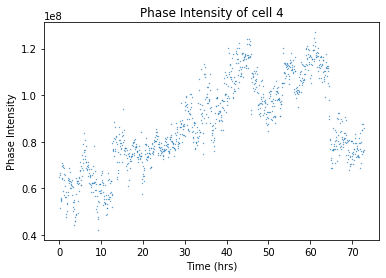

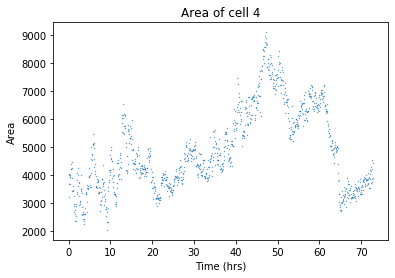

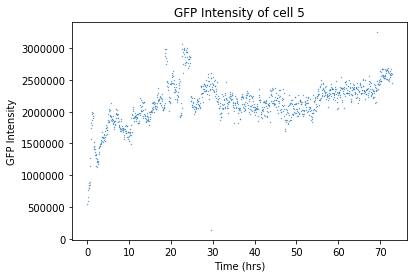

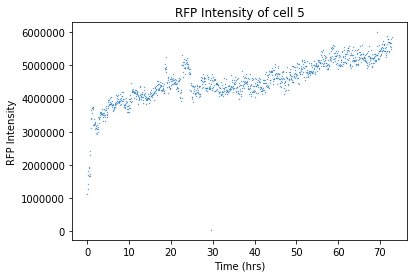

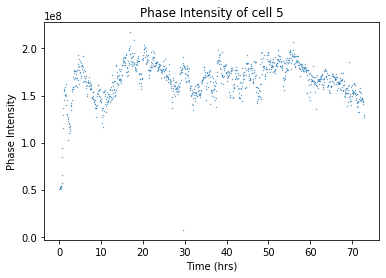

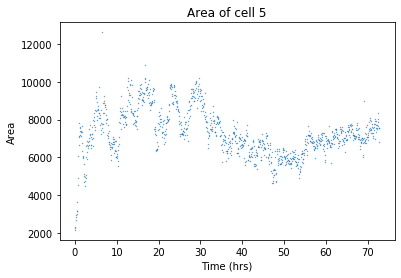

In [98]:
### Raw data plots 
for cell in cell_ids:
    cell_id = "cell" + cell
    stat_location = os.path.join(cell_id, "stats.csv")

    df = pd.read_csv(os.path.join(root_path, stat_location))

    x = df.index
    x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins

    y_variables = df.columns[0:4] #this calls just the first four variables 
    for y in y_variables:
        intensity = df[y]            
        plt.scatter(x_time,[intensity], s= 0.1)
        plt.ylabel(y)
        plt.xlabel('Time (hrs)')
        title = y + ' of cell ' + cell
        plt.title(title)
        plt.show()


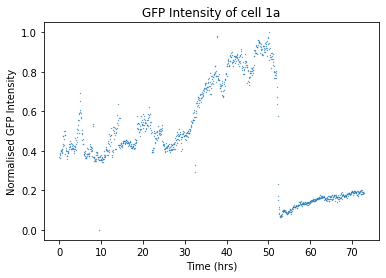

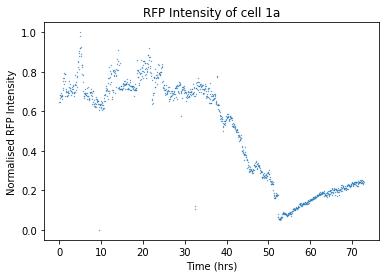

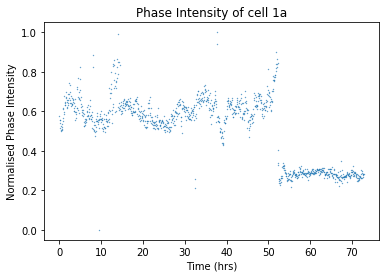

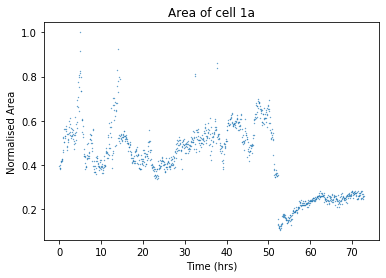

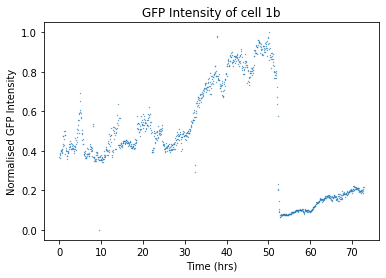

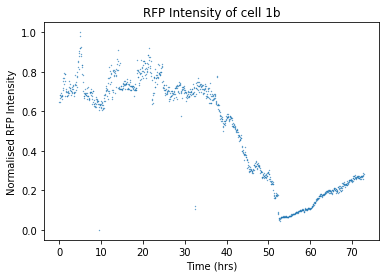

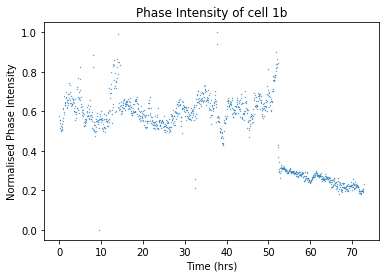

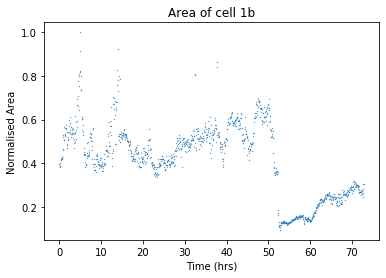

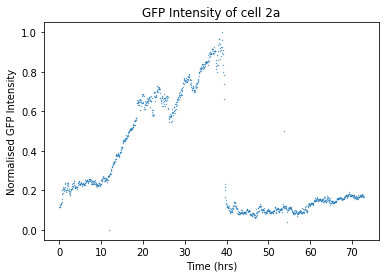

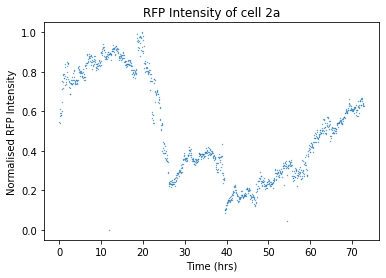

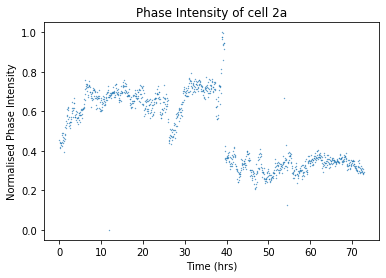

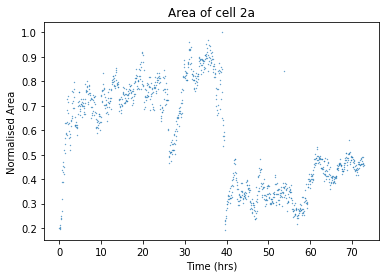

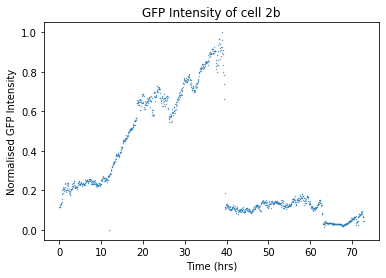

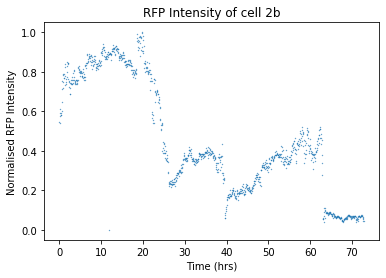

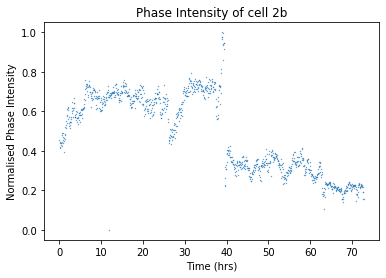

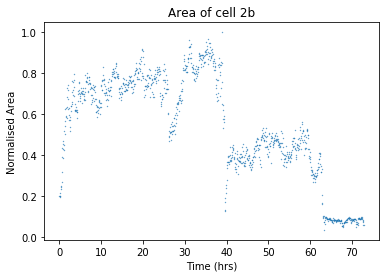

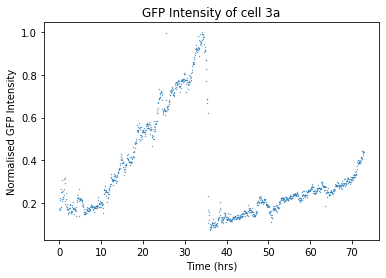

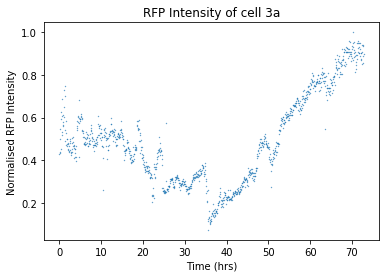

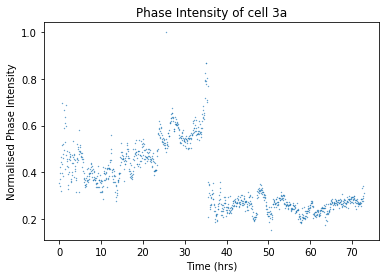

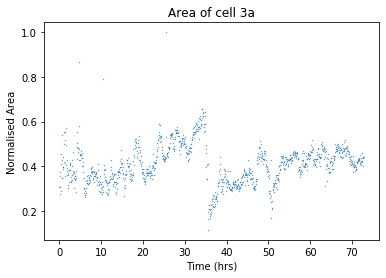

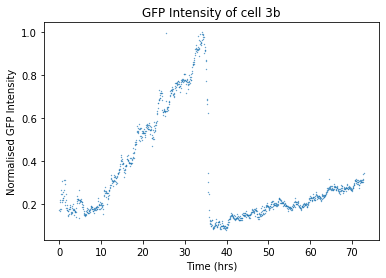

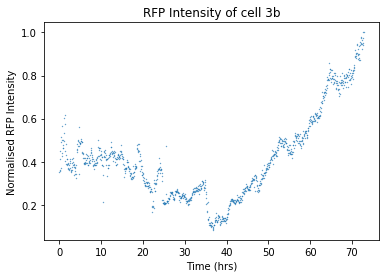

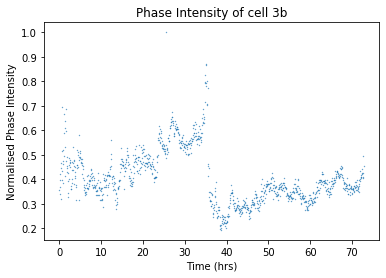

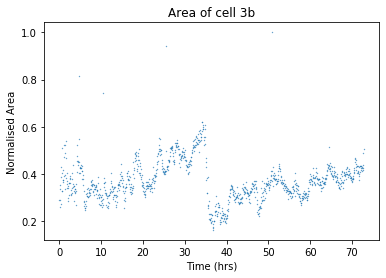

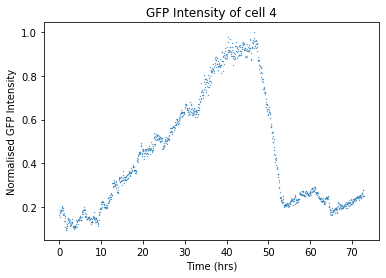

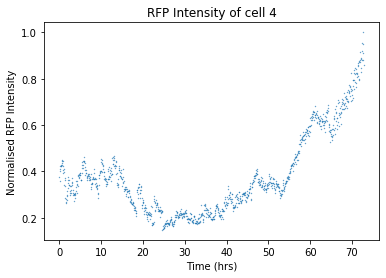

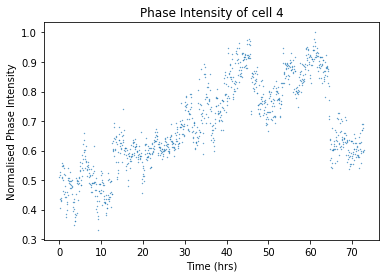

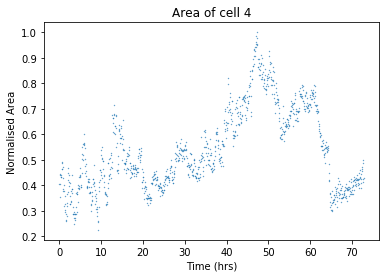

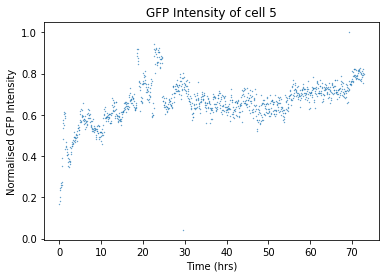

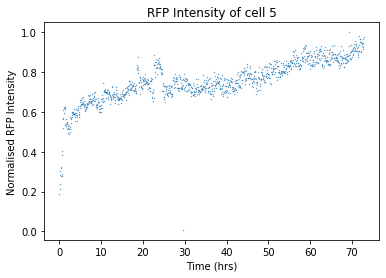

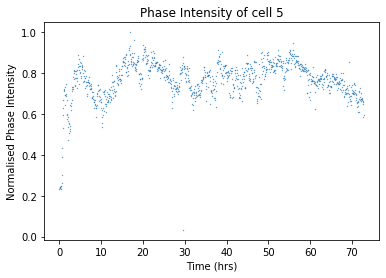

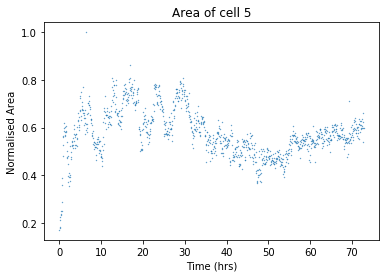

In [120]:
### Normalised data plots

def normalisation(series):
    max_series = np.amax(series)
    norm_factor = 1 / max_series
    scaled_series = series * norm_factor
    return scaled_series

for cell in cell_ids:
    cell_id = "cell" + cell
    stat_location = os.path.join(cell_id, "stats.csv")

    df = pd.read_csv(os.path.join(root_path, stat_location))

    x = df.index
    x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins

    y_variables = df.columns[0:4] #this calls just the first four variables 
    for y in y_variables:
        #intensity = df[y] 
        norm_intensity = normalisation(df[y])      
        plt.scatter(x_time,[norm_intensity], s= 0.1)
        ylabel = "Normalised " + y
        plt.ylabel(ylabel)
        plt.xlabel('Time (hrs)')
        title = y + ' of cell ' + cell
        plt.title(title)
        plt.show()

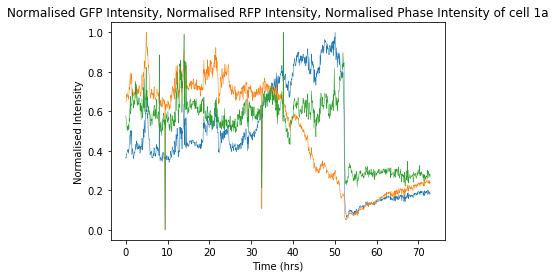

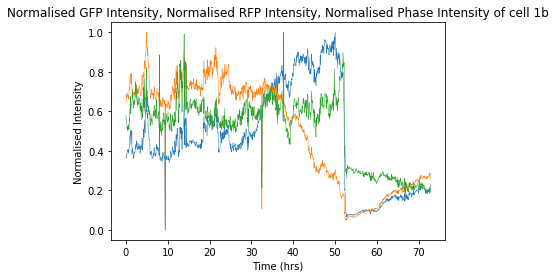

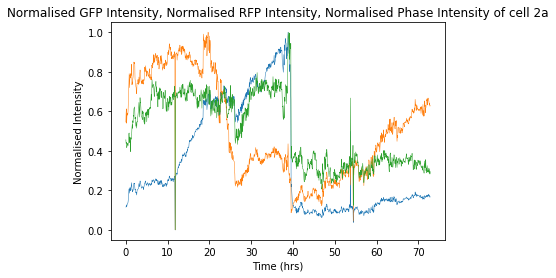

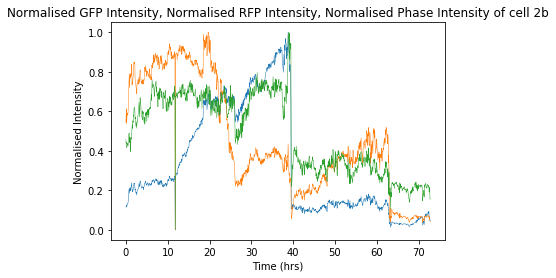

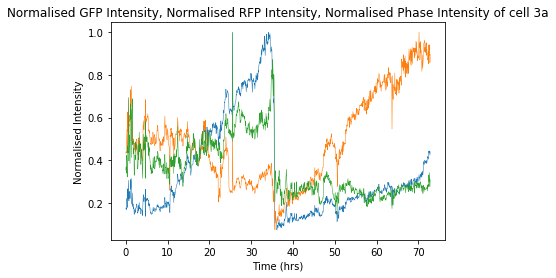

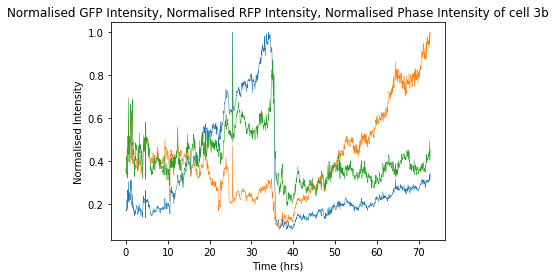

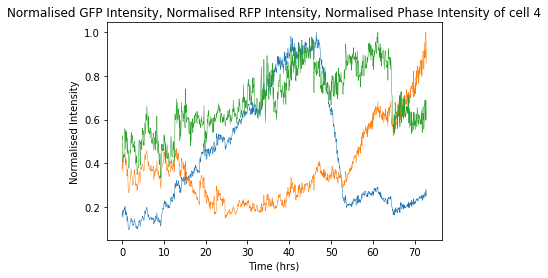

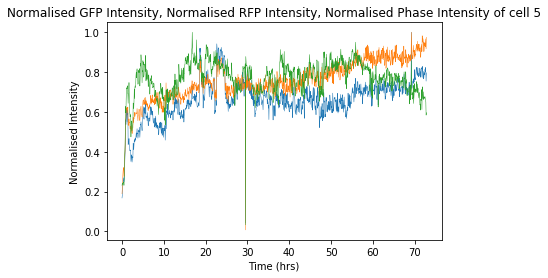

In [171]:
### Overlaid normalised plots 
norm_df = pd.DataFrame([])

for cell in cell_ids:
    cell_id = "cell" + cell
    stat_location = os.path.join(cell_id, "stats.csv")

    df = pd.read_csv(os.path.join(root_path, stat_location))

    x = df.index
    x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins


    for y in y_variables:
            #intensity = df[y] 
            name = 'Normalised ' + y
            norm_intensity = normalisation(df[y]) 
            norm_df[name] = norm_intensity

    plt.plot(x_time, norm_df[norm_df.columns[0]], linewidth=0.5)
    plt.plot(x_time, norm_df[norm_df.columns[1]], linewidth=0.5)
    plt.plot(x_time, norm_df[norm_df.columns[2]], linewidth=0.5)
    plt.ylabel("Normalised Intensity")
    plt.xlabel('Time (hrs)')
    title = "Normalised intensity" of cell " + cell
    #title = norm_df.columns[0]+", "+ norm_df.columns[1]+ ", "+ norm_df.columns[2]+" of cell " + cell
    plt.title(title)
    plt.show()       